In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [49]:
df=pd.read_csv('adult.csv')

In [50]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [51]:
# Checking the different levels of income
df['income'].value_counts()

 <=50K    12097
 >50K      3819
Name: income, dtype: int64

In [52]:
# Converting income to binary class 1 and 0, 1 means the income is greater than 50K, otherwise 0
df.loc[df.income==' <=50K','income']=0
df.loc[df.income==' >50K','income']=1

In [53]:
# Store variables that needs to convert to dummies, it would be easier if changes are to be made in this process
to_dummy=['workclass','marital_status','occupation','relationship','race','sex','native-country']
newdf=pd.get_dummies(df,columns=to_dummy)

In [54]:
# Exclude education for now since it's throwing off errors that cannot be coped with at the moment
# Since education-num captures the years of education, we still have information on each individuals' education level
exclude_var=['income','education']
X=newdf.drop(exclude_var,axis=1)
y=newdf['income'].astype('int')

In [55]:
#Tried this method to deal with earlier errors but did not work
#newdf=pd.to_numeric(newdf.columns[7:], errors='ignore',downcast="integer")

In [56]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=6120)

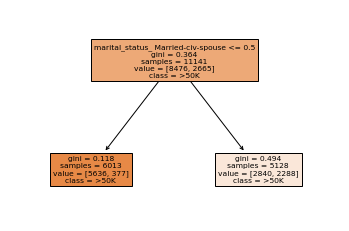

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

#train a very simple model
tree_1 = DecisionTreeClassifier(random_state=0, max_depth=1) #max_depth limits the tree to one split
tree_1.fit(X_train, y_train)



#let's plot it
plot_tree(tree_1, feature_names=X.columns,  
                   class_names=['>50K', '<=50K'],
                      filled=True
                   )

plt.show() #if you remove this it will produce the text behind the tree as well.

In [58]:
# Use classification report, just a personal preference. It seems everyone is classified as having income less than or equal to 50K
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train,tree_1.predict(X_train)))
print(classification_report(y_test,tree_1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      8476
           1       0.00      0.00      0.00      2665

    accuracy                           0.76     11141
   macro avg       0.38      0.50      0.43     11141
weighted avg       0.58      0.76      0.66     11141

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      3621
           1       0.00      0.00      0.00      1154

    accuracy                           0.76      4775
   macro avg       0.38      0.50      0.43      4775
weighted avg       0.58      0.76      0.65      4775



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning:

In [59]:
# Bagging Model
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100)
bagging.fit(X_train, y_train)

print(classification_report(y_train,bagging.predict(X_train)))
print(classification_report(y_test,bagging.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8476
           1       1.00      1.00      1.00      2665

    accuracy                           1.00     11141
   macro avg       1.00      1.00      1.00     11141
weighted avg       1.00      1.00      1.00     11141

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      3621
           1       0.75      0.60      0.67      1154

    accuracy                           0.85      4775
   macro avg       0.81      0.77      0.79      4775
weighted avg       0.85      0.85      0.85      4775



The model definitely seems to be overfit, given the model's perfect performance on train dataset but less desireable performance in the test set, especially a poorer performance in class 1 of target variable (income >50K).

In [60]:
from sklearn.ensemble import AdaBoostClassifier

boosting = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=100)
boosting.fit(X_train, y_train)

print(classification_report(y_train,boosting.predict(X_train)))
print(classification_report(y_test,boosting.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8476
           1       1.00      1.00      1.00      2665

    accuracy                           1.00     11141
   macro avg       1.00      1.00      1.00     11141
weighted avg       1.00      1.00      1.00     11141

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      3621
           1       0.60      0.62      0.61      1154

    accuracy                           0.81      4775
   macro avg       0.74      0.74      0.74      4775
weighted avg       0.81      0.81      0.81      4775



Same issue spotted in AdaBoost. Let's try to see if we can improve the decision tree with gridsearch.

In [61]:
from sklearn.model_selection import GridSearchCV

# Start with an initial guess for parameters - with a larger dataset, you'd want many more parameters!
param_grid = {
'max_depth': [5, 10, 15, 20, 25],
'min_samples_split': [10, 20, 30, 40, 50],
'min_impurity_decrease': [0, 0.0005, 0.001, 0.005],
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=6120), param_grid, cv=5,
n_jobs=-1) # n_jobs=-1 will utilize all available CPUs
gridSearch.fit(X_train, y_train)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

bestRegTree = gridSearch.best_estimator_

Initial score:  0.850282710444097
Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.001, 'min_samples_split': 10}


In [62]:
#let's try narrowing in
param_grid = {
'max_depth': [8, 9, 10, 11, 12, 13],
'min_samples_split': [6, 8, 10, 12, 14],
'min_impurity_decrease': [0.0009, 0.00095, 0.001, 0.0015, 0.002],
}

gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=6120), param_grid, cv=5,
n_jobs=-1) # n_jobs=-1 will utilize all available CPUs
gridSearch.fit(X_train, y_train)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

bestdTree = gridSearch.best_estimator_

Improved score:  0.850282710444097
Improved parameters:  {'max_depth': 9, 'min_impurity_decrease': 0.00095, 'min_samples_split': 6}


In [63]:
# Best decision tree performance on train and test set
print(classification_report(y_train,bestdTree.predict(X_train)))
print(classification_report(y_test,bestdTree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      8476
           1       0.78      0.54      0.64      2665

    accuracy                           0.85     11141
   macro avg       0.83      0.75      0.78     11141
weighted avg       0.85      0.85      0.84     11141

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      3621
           1       0.78      0.53      0.63      1154

    accuracy                           0.85      4775
   macro avg       0.82      0.74      0.77      4775
weighted avg       0.84      0.85      0.84      4775



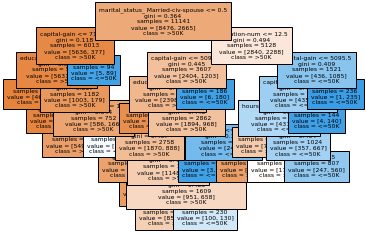

<Figure size 864x864 with 0 Axes>

In [66]:
#let's plot it, it's very hard to since at greater depth things can get out of hand pretty quickly
#But here's the best combination of fontsize and figsize I found (at least the top depths are readable haha)
plot_tree(bestdTree, feature_names=X.columns,  
                   class_names=['>50K', '<=50K'],
                      filled=True,
          fontsize=6
                   )
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
plt.show() #if you remove this it will produce the text behind the tree as well.

The decision tree's performance has greatly improved, especially since it is no longer classfying everyone as having income no greater than 50K and the model has ok performance. Still, predicting class 1 seems to be difficult.
Note that the best decision tree has a similar level of performance with bagged model in the test set, but does not suffer from the overfitting issue in train dataset.
Let's try grid search on bagging.

In [67]:
# candidate parameters for bagging grid search
bag_params = {'n_estimators': [80,100,120],
          'max_samples': [0.5,1.0,1.5],
          'max_features': [0.5,1.0,1.5]}

In [68]:
# Initialize the gridsearch and fit on training data to see best parameters
bagging_grid = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(),random_state=6120), param_grid =bag_params, cv=3, n_jobs=-1, verbose=1)
bagging_grid.fit(X_train, y_train)
print('Improved score: ', bagging_grid.best_score_)
print('Improved parameters: ', bagging_grid.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 81.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\ensemble\_bagging.py", line 269, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "D:\Anaconda\lib\site-packages\sklearn\ensemble\_bagging.py", line 328, in _fit
    raise ValueError("max_samples must be in (0, n_samples]")
ValueError: max_samples mus

Improved score:  0.8590787688330401
Improved parameters:  {'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 80}


In [69]:
#Narrowing down on parameters and one more gridsearch
bag_params = {'n_estimators': [70,80,90],
          'max_samples': [0.75,1.0,1.25],
          'max_features': [0.25,0.5,0.75]}
bagging_grid = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(),random_state=6120), param_grid =bag_params, cv=3, n_jobs=-1, verbose=1)
bagging_grid.fit(X_train, y_train)
print('Improved score: ', bagging_grid.best_score_)
print('Improved parameters: ', bagging_grid.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
27 fits failed out of a total of 81.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\ensemble\_bagging.py", line 269, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "D:\Anaconda\lib\site-packages\sklearn\ensemble\_bagging.py", line 328, in _fit
    raise ValueError("max_samples must be in (0, n_samples]")
ValueError: max_samples mus

Improved score:  0.8590787688330401
Improved parameters:  {'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 80}


In [70]:
# The result is the same as the previous run, let's see the performance
best_bagging = bagging_grid.best_estimator_
print(classification_report(y_train,best_bagging.predict(X_train)))
print(classification_report(y_test,best_bagging.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      8476
           1       1.00      0.97      0.99      2665

    accuracy                           0.99     11141
   macro avg       1.00      0.99      0.99     11141
weighted avg       0.99      0.99      0.99     11141

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      3621
           1       0.80      0.58      0.67      1154

    accuracy                           0.86      4775
   macro avg       0.84      0.77      0.79      4775
weighted avg       0.86      0.86      0.85      4775



The overfitting issue on train dataset is still present, however there is slight improvement for test set performance.